In [17]:
#import modules
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

#import API key
from apikey import apikey
tempunit = "imperial"

#incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

#range of latitudes and longitudes
latrange = (-90, 90)
lngrange = (-180, 180)

#define url
url = f"http://api.openweathermap.org/data/2.5/weather?appid={apikey}&units={tempunit}&q="

#define counters
counter = 0
setter = 1

In [2]:
#list for holding lat/long and cities
latlong = []
cities = []

#create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
longs = np.random.uniform(low=-180.000, high=180.000, size=1500)
latlong = zip(lats, longs)

#identify nearest city for each lat, lng combination
for latlon in latlong:
    city = citipy.nearest_city(latlon[0], latlon[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

#print the city count to confirm sufficient count
len(cities)

599

In [3]:
#set lists for the dataframe
cityname = []
cloudinesses = []
dates = []
humidities = []
lats = []
longs = []
maxtemp = []
windspeed = []
countries = []

#set initial counters
counter = 0
setter = 1

#for loop to create dataframe
print("Beginning Data Retrieval\n------------------------------")
for city in cities:
    try:
        response = requests.get(url + city.replace(" ","&")).json()
        cloudinesses.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        longs.append(response['coord']['lon'])
        maxtemp.append(response['main']['temp_max'])
        windspeed.append(response['wind']['speed'])
        if counter > 48:
            counter = 1
            setter += 1
            cityname.append(city)
        else:
            counter += 1
            cityname.append(city)
        print(f"Processing Record {counter} of Set {setter} | {city}")
    except Exception:
        print("City not found. Skipping...")
print("------------------------------\nData Retrieval Complete\n------------------------------")

Beginning Data Retrieval
------------------------------
Processing Record 1 of Set 1 | kuruman
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | castro
Processing Record 4 of Set 1 | pattaya
Processing Record 5 of Set 1 | avarua
Processing Record 6 of Set 1 | cape town
Processing Record 7 of Set 1 | souillac
Processing Record 8 of Set 1 | ribeira grande
Processing Record 9 of Set 1 | kapaa
Processing Record 10 of Set 1 | carnarvon
Processing Record 11 of Set 1 | whitehorse
Processing Record 12 of Set 1 | tuktoyaktuk
Processing Record 13 of Set 1 | roald
Processing Record 14 of Set 1 | georgetown
City not found. Skipping...
Processing Record 15 of Set 1 | beringovskiy
Processing Record 16 of Set 1 | zwedru
Processing Record 17 of Set 1 | roblin
Processing Record 18 of Set 1 | pisco
Processing Record 19 of Set 1 | tiksi
City not found. Skipping...
Processing Record 20 of Set 1 | fortuna
Processing Record 21 of Set 1 | bredasdorp
Processing Record 22 of Set 1 | qaqorto

Processing Record 45 of Set 4 | sivaki
Processing Record 46 of Set 4 | karratha
Processing Record 47 of Set 4 | kokstad
Processing Record 48 of Set 4 | ilulissat
Processing Record 49 of Set 4 | mahebourg
Processing Record 1 of Set 5 | harlingen
Processing Record 2 of Set 5 | esperance
Processing Record 3 of Set 5 | caravelas
Processing Record 4 of Set 5 | cam ranh
Processing Record 5 of Set 5 | znojmo
Processing Record 6 of Set 5 | saldanha
Processing Record 7 of Set 5 | constitucion
Processing Record 8 of Set 5 | camacha
City not found. Skipping...
Processing Record 9 of Set 5 | myitkyina
Processing Record 10 of Set 5 | collecchio
Processing Record 11 of Set 5 | alenquer
Processing Record 12 of Set 5 | katsuura
Processing Record 13 of Set 5 | veraval
Processing Record 14 of Set 5 | sondrio
Processing Record 15 of Set 5 | posse
Processing Record 16 of Set 5 | langenburg
Processing Record 17 of Set 5 | ambilobe
Processing Record 18 of Set 5 | aklavik
Processing Record 19 of Set 5 | klou

Processing Record 30 of Set 8 | yeppoon
Processing Record 31 of Set 8 | aswan
Processing Record 32 of Set 8 | sokolskoye
Processing Record 33 of Set 8 | olafsvik
City not found. Skipping...
Processing Record 34 of Set 8 | havelock
Processing Record 35 of Set 8 | luanda
Processing Record 36 of Set 8 | olenino
Processing Record 37 of Set 8 | broome
Processing Record 38 of Set 8 | lucapa
Processing Record 39 of Set 8 | ancud
Processing Record 40 of Set 8 | san cristobal
Processing Record 41 of Set 8 | charlestown
Processing Record 42 of Set 8 | rocha
Processing Record 43 of Set 8 | pochutla
Processing Record 44 of Set 8 | itarema
Processing Record 45 of Set 8 | goya
Processing Record 46 of Set 8 | ipubi
Processing Record 47 of Set 8 | bagotville
Processing Record 48 of Set 8 | kibakwe
City not found. Skipping...
City not found. Skipping...
Processing Record 49 of Set 8 | chapais
Processing Record 1 of Set 9 | kang
Processing Record 2 of Set 9 | sao gabriel da cachoeira
Processing Record 3

In [4]:
# convert raw data to dataFrame
# create a dictionary for establishing dataframe
weatherdict = {
    "City":cityname,
    "Cloudiness":cloudinesses,
    "Country":countries,
    "Date":dates,
    "Humidity":humidities,
    "Lat":lats,
    "Lng":longs,
    "Max Temp":maxtemp,
    "Wind Speed":windspeed
}

# establish dataframe
weatherdf = pd.DataFrame(weatherdict)
# output data to csv
outputcsv = "outputdata.csv"
weatherdf.to_csv(outputcsv)
weatherdf

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,kuruman,1,ZA,1604807417,57,-27.45,23.43,60.01,5.39
1,ushuaia,40,AR,1604807152,47,-54.80,-68.30,55.40,18.34
2,castro,0,BR,1604807418,65,-24.79,-50.01,58.24,3.96
3,pattaya,20,TH,1604807276,74,12.93,100.88,82.40,6.93
4,avarua,59,CK,1604807418,73,-21.21,-159.78,77.00,2.24
...,...,...,...,...,...,...,...,...,...
541,arlit,0,NE,1604807502,30,18.74,7.39,68.63,11.50
542,cortez,75,US,1604807444,62,37.35,-108.59,53.60,32.21
543,shelburne,7,CA,1604807509,62,44.08,-80.20,57.00,15.23
544,tadine,20,NC,1604807509,71,-21.55,167.88,76.95,14.27


In [5]:
#weather count
weatherdf.count()

City          546
Cloudiness    546
Country       546
Date          546
Humidity      546
Lat           546
Lng           546
Max Temp      546
Wind Speed    546
dtype: int64

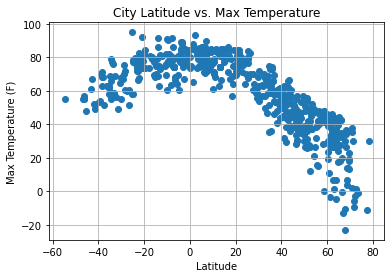

In [7]:
#latitude vs. temperature plot
plt.scatter(weatherdf["Lat"],weatherdf["Max Temp"])
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-")
plt.savefig("temperature.png")
plt.show()

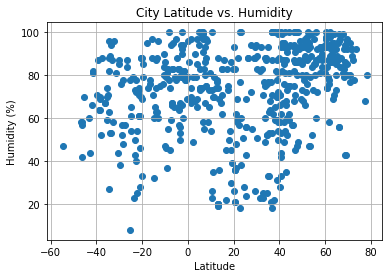

In [8]:
#latitude vs. humidity plot
plt.scatter(weatherdf["Lat"],weatherdf["Humidity"])
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-")
plt.savefig("humidity.png")
plt.show()

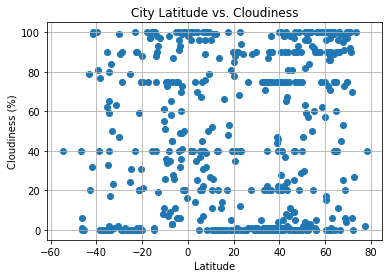

In [9]:
#latitude vs. cloudiness plot
plt.scatter(weatherdf["Lat"],weatherdf["Cloudiness"])
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-")
plt.savefig("cloudiness.png")
plt.show()

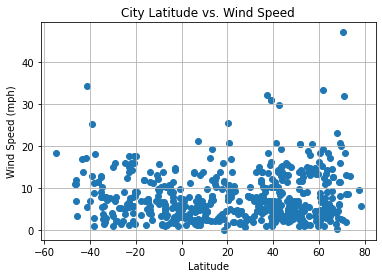

In [10]:
#latitude vs. wind speed plot
plt.scatter(weatherdf["Lat"],weatherdf["Wind Speed"])
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid (b=True,which="major",axis="both",linestyle="-")
plt.savefig("windspeed.png")
plt.show()

In [12]:
#create northern and southern hemisphere dfs
northerndf = weatherdf.loc[pd.to_numeric(weatherdf["Lat"]).astype(float) > 0, :]
southerndf = weatherdf.loc[pd.to_numeric(weatherdf["Lat"]).astype(float) < 0, :]

Regression line equation is: y = -0.99x + 91.22
The r-squared is: -0.8781419773398879


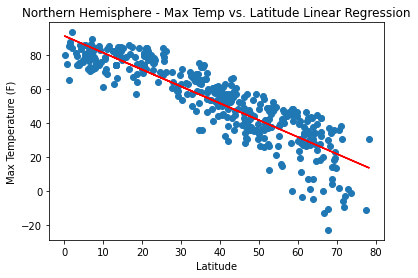

In [37]:
#northern hemisphere - max Temp vs. latitude linear regression
xval = pd.to_numeric(northerndf['Lat']).astype(float)
yval = pd.to_numeric(northerndf['Max Temp']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(xval, yval)
regressvalues = xval * slope + intercept
line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line}")
plt.scatter(xval,yval)
plt.plot(xval,regressvalues,"r-")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
plt.savefig("north1.png")
plt.show()

Regression line equation is: y = 0.53x + 82.68
The r-squared is: 0.6733075575664109


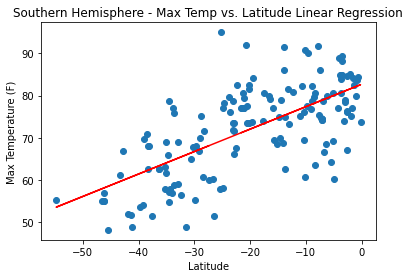

In [38]:
#southern hemisphere - max temp vs. latitude linear regression
xval = pd.to_numeric(southerndf['Lat']).astype(float)
yval = pd.to_numeric(southerndf['Max Temp']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(xval, yval)
regressvalues = xval * slope + intercept
line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line}")
plt.scatter(xval,yval)
plt.plot(xval,regressvalues,"r-")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
plt.savefig("south1.png")
plt.show()

Regression line equation is: y = 0.33x + 61.58
The r-squared is: 0.31184967365420696


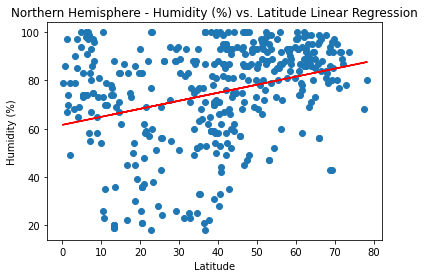

In [42]:
#northern hemisphere - humidity (%) vs. latitude linear regression
xval = pd.to_numeric(northerndf['Lat']).astype(float)
yval = pd.to_numeric(northerndf['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(xval, yval)
regressvalues = xval * slope + intercept
line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line}")
plt.scatter(xval,yval)
plt.plot(xval,regressvalues,"r-")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
plt.savefig("north2.png")
plt.show()

Regression line equation is: y = 0.31x + 75.75
The r-squared is: 0.23036903911358175


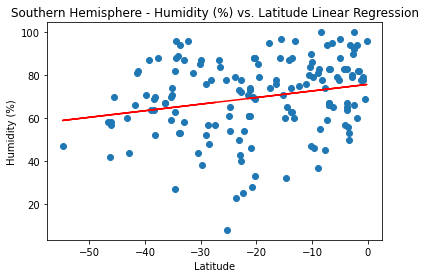

In [44]:
#southern hemisphere - humidity (%) vs. latitude linear regression
xval = pd.to_numeric(southerndf['Lat']).astype(float)
yval = pd.to_numeric(southerndf['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(xval, yval)
regressvalues = xval * slope + intercept
line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line}")
plt.scatter(xval,yval)
plt.plot(xval,regressvalues,"r-")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
plt.savefig("south2.png")
plt.show()

Regression line equation is: y = 0.43x + 30.44
The r-squared is: 0.21154609141039207


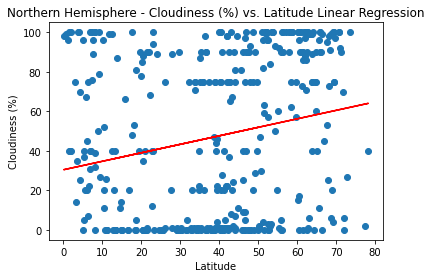

In [45]:
#northern hemisphere - cloudiness (%) vs. latitude linear regression
xval = pd.to_numeric(northerndf['Lat']).astype(float)
yval = pd.to_numeric(northerndf['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(xval, yval)
regressvalues = xval * slope + intercept
line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line}")
plt.scatter(xval,yval)
plt.plot(xval,regressvalues,"r-")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
plt.savefig("north3.png")
plt.show()

Regression line equation is: y = 0.67x + 58.4
The r-squared is: 0.24083172633317038


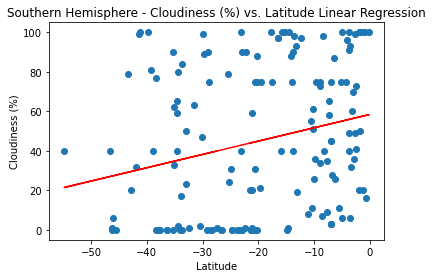

In [48]:
#southern hemisphere - cloudiness (%) vs. latitude linear regression
xval = pd.to_numeric(southerndf['Lat']).astype(float)
yval = pd.to_numeric(southerndf['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(xval, yval)
regressvalues = xval * slope + intercept
line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line}")
plt.scatter(xval,yval)
plt.plot(xval,regressvalues,"r-")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
plt.savefig("south3.png")
plt.show()

Regression line equation is: y = 0.06x + 5.85
The r-squared is: 0.18054889984731715


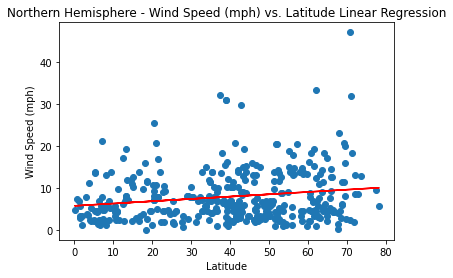

In [49]:
#northern hemisphere - wind speed (mph) vs. latitude linear regression
xval = pd.to_numeric(northerndf['Lat']).astype(float)
yval = pd.to_numeric(northerndf['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(xval, yval)
regressvalues = xval * slope + intercept
line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line}")
plt.scatter(xval,yval)
plt.plot(xval,regressvalues,"r-")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
plt.savefig("north4.png")
plt.show()

Regression line equation is: y = -0.12x + 5.57
The r-squared is: -0.2972853519020331


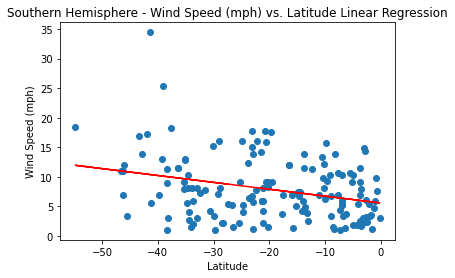

In [50]:
#southern hemisphere - wind speed (mph) vs. latitude linear regression
xval = pd.to_numeric(southerndf['Lat']).astype(float)
yval = pd.to_numeric(southerndf['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(xval, yval)
regressvalues = xval * slope + intercept
line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line}")
plt.scatter(xval,yval)
plt.plot(xval,regressvalues,"r-")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
plt.savefig("south4.png")
plt.show()